# CS4650 Capstone: Kaggle Competition - Spaceship Titanic

## Initial Setup

### Import libraries

In [17]:
# Standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Configure visualization styles
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-darkgrid') # Using a specific style from matplotlib

# YDF will come later, but good to have handy
import ydf

print("Libraries imported successfully!")

Libraries imported successfully!


### Load data and inspect

In [18]:
# Define file paths (adjust if your notebook is not in the same folder as the CSVs)
train_data_path = 'train.csv'
test_data_path = 'test.csv'
submission_path = 'sample_submission.csv'

# Load the datasets into pandas DataFrames
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
df_submission = pd.read_csv(submission_path)

print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
print(f"Submission example shape: {df_submission.shape}")

Training data shape: (8693, 14)
Test data shape: (4277, 13)
Submission example shape: (4277, 2)


In [19]:
# Look at the first few rows of the training data
print("First 5 rows of training data:")
display(df_train.head())

# Look at the first few rows of the test data
print("\nFirst 5 rows of test data:")
display(df_test.head())

# Look at the submission format
print("\nSample submission format:")
display(df_submission.head())

First 5 rows of training data:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



First 5 rows of test data:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez



Sample submission format:


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [20]:
# Get concise summary of the training dataframe
print("\nTraining data info:")
df_train.info()

print("\nTest data info:")
df_test.info()

# Get descriptive statistics for numerical columns in training data
print("\nTraining data numerical statistics:")
display(df_train.describe())

# Get descriptive statistics for categorical columns too (include='all' gets both)
print("\nTraining data all columns statistics:")
display(df_train.describe(include='all'))


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000



Training data all columns statistics:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Ankalik Nateansive,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [21]:
# Calculate the number of missing values per column in the training set
print("Missing values per column (Train):")
missing_train = df_train.isnull().sum()
print(missing_train[missing_train > 0]) # Only show columns with missing values

# Calculate the number of missing values per column in the test set
print("\nMissing values per column (Test):")
missing_test = df_test.isnull().sum()
print(missing_test[missing_test > 0]) # Only show columns with missing values

Missing values per column (Train):
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

Missing values per column (Test):
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64



Distribution of Target Variable (Transported):
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


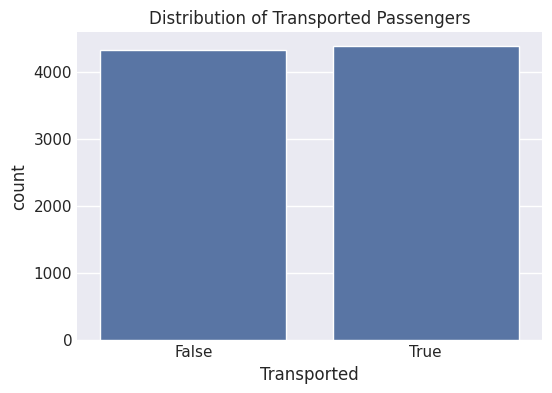

In [22]:
# See the distribution of the target variable 'Transported'
print("\nDistribution of Target Variable (Transported):")
print(df_train['Transported'].value_counts(normalize=True)) # normalize=True gives percentage

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x='Transported')
plt.title('Distribution of Transported Passengers')
plt.show()

### Data cleanup and feature extraction

In [23]:
# Make copies to avoid modifying the original dataframes unintentionally
df_train_processed = df_train.copy()
df_test_processed = df_test.copy()

# --- Cabin Features ---
# The 'Cabin' column is in 'deck/num/side' format. Let's split it.
# We'll fill missing Cabin values with a placeholder 'Unknown/0/Unknown' first
# Then split. Use errors='ignore' in case splitting fails on the placeholder.
for df in [df_train_processed, df_test_processed]:
    df['Cabin'] = df['Cabin'].fillna('Unknown/0/Unknown')
    # Use expand=True to get new columns directly
    df[['Deck', 'Cabin_Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    # We probably don't need the original 'Cabin' or the 'Cabin_Num' now
    # Cabin_Num might be useful later, but let's drop it for now for simplicity
    # Also convert Cabin_Num to numeric, coercing errors
    df['Cabin_Num'] = pd.to_numeric(df['Cabin_Num'], errors='coerce') # Coerce will turn non-numbers into NaN
    # Let's keep Cabin_Num for now, might be useful. Drop original 'Cabin'.
    df.drop('Cabin', axis=1, inplace=True)

print("Split 'Cabin' into 'Deck', 'Cabin_Num', 'Side'. Filled NaNs initially.")
display(df_train_processed[['Deck', 'Cabin_Num', 'Side']].head())

# --- Expenditure Features ---
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# Create 'TotalExpenditure'
for df in [df_train_processed, df_test_processed]:
    # Fill NaN in expenditure columns with 0 before summing
    df[expenditure_cols] = df[expenditure_cols].fillna(0)
    df['TotalExpenditure'] = df[expenditure_cols].sum(axis=1)
    # Create a binary feature for anyone who spent *anything*
    df['HasExpenditure'] = (df['TotalExpenditure'] > 0).astype(int) # Convert boolean to 0/1

print("\nCreated 'TotalExpenditure' and 'HasExpenditure'. Filled NaNs in components with 0.")
display(df_train_processed[['TotalExpenditure', 'HasExpenditure'] + expenditure_cols].head())

# --- Group Information from PassengerId ---
# PassengerId is 'gggg_pp'. gggg is the group, pp is the person within the group.
for df in [df_train_processed, df_test_processed]:
    df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('count')

print("\nExtracted 'Group' and calculated 'GroupSize' from PassengerId.")
display(df_train_processed[['PassengerId', 'Group', 'GroupSize']].head())

# --- Drop Less Useful Columns ---
# Name might be complex to parse reliably, PassengerId is redundant now we have Group/GroupSize
# Let's drop them for now. Revisit 'Name' later if needed.
# Also dropping original Cabin (already done) and Cabin_Num (might be noisy/less useful than Deck/Side)
# EDIT: decided to keep Cabin_Num for now, let's drop Name and PassengerId
for df in [df_train_processed, df_test_processed]:
     df.drop(['Name', 'PassengerId'], axis=1, inplace=True)

print("\nDropped 'Name' and 'PassengerId' columns.")

Split 'Cabin' into 'Deck', 'Cabin_Num', 'Side'. Filled NaNs initially.


,Deck,Cabin_Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S



Created 'TotalExpenditure' and 'HasExpenditure'. Filled NaNs in components with 0.


,TotalExpenditure,HasExpenditure,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,736.0,1,109.0,9.0,25.0,549.0,44.0
2,10383.0,1,43.0,3576.0,0.0,6715.0,49.0
3,5176.0,1,0.0,1283.0,371.0,3329.0,193.0
4,1091.0,1,303.0,70.0,151.0,565.0,2.0



Extracted 'Group' and calculated 'GroupSize' from PassengerId.


,PassengerId,Group,GroupSize
0,0001_01,1,1
1,0002_01,2,1
2,0003_01,3,2
3,0003_02,3,2
4,0004_01,4,1



Dropped 'Name' and 'PassengerId' columns.


In [24]:
# Re-check missing values after feature engineering
print("Missing values BEFORE imputation (Train):")
print(df_train_processed.isnull().sum()[df_train_processed.isnull().sum() > 0])
print("\nMissing values BEFORE imputation (Test):")
print(df_test_processed.isnull().sum()[df_test_processed.isnull().sum() > 0])


# --- Imputation Strategy ---

# Columns to impute
num_cols_impute_median = ['Age', 'Cabin_Num']
cat_cols_impute_mode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Apply imputation to both training and test sets
for df in [df_train_processed, df_test_processed]:
    # Impute Numerical with Median (calculated from TRAINING data)
    for col in num_cols_impute_median:
        if col in df.columns and df[col].isnull().any(): # Check if col exists and has NaNs
             # Calculate median from the training data ONLY
            median_val = df_train_processed[col].median()
            # Use assignment instead of inplace=True
            df[col] = df[col].fillna(median_val)

    # Impute Categorical with Mode (calculated from TRAINING data)
    for col in cat_cols_impute_mode:
        if col in df.columns and df[col].isnull().any(): # Check if col exists and has NaNs
            # Calculate mode from the training data ONLY
            mode_val = df_train_processed[col].mode()[0] # mode() can return multiple values if tied, take the first
            # Use assignment instead of inplace=True
            df[col] = df[col].fillna(mode_val)


print("\n--- Imputation Complete ---")

# --- Verification ---
print("\nMissing values AFTER imputation (Train):")
print(df_train_processed.isnull().sum().sum()) # Should be 0

print("\nMissing values AFTER imputation (Test):")
print(df_test_processed.isnull().sum().sum()) # Should be 0

# Display info to check data types again
print("\nTrain data info after processing:")
df_train_processed.info()

# Display info for test data too
print("\nTest data info after processing:")
df_test_processed.info()

Missing values BEFORE imputation (Train):
HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
dtype: int64

Missing values BEFORE imputation (Test):
HomePlanet     87
CryoSleep      93
Destination    92
Age            91
VIP            93
dtype: int64

--- Imputation Complete ---

Missing values AFTER imputation (Train):
0

Missing values AFTER imputation (Test):
0

Train data info after processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8693 non-null   object 
 1   CryoSleep         8693 non-null   bool   
 2   Destination       8693 non-null   object 
 3   Age               8693 non-null   float64
 4   VIP               8693 non-null   bool   
 5   RoomService       8693 non-null   float64
 6   FoodCourt         8693 non-null   float64
 7   ShoppingMall      8

/tmp/ipykernel_92106/181572864.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_val)
/tmp/ipykernel_92106/181572864.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_val)


### Visualize the data

--- Numerical Feature Distributions (Training Data) ---


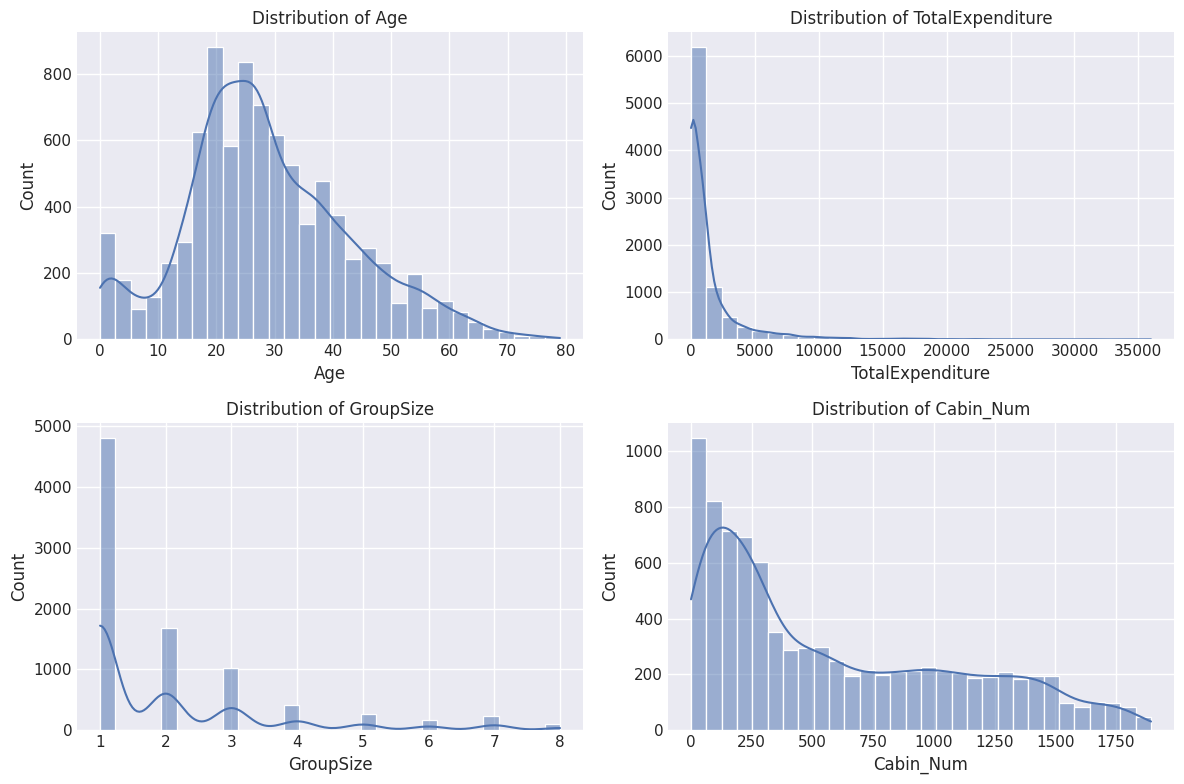

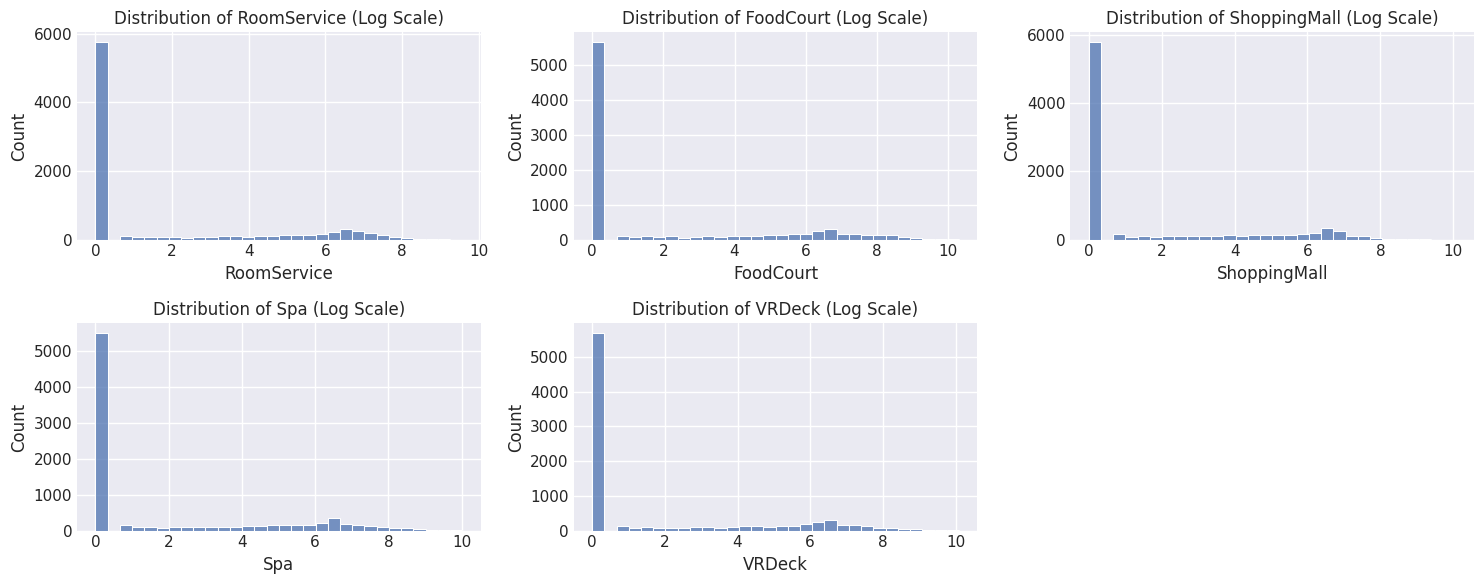

In [25]:
# Select numerical features for plotting (excluding IDs like Group if they act more like categories)
# Also excluding the individual expenditure columns since we have TotalExpenditure
numerical_features = ['Age', 'TotalExpenditure', 'GroupSize', 'Cabin_Num']
# Let's also look at the raw expenditure columns just in case
expenditure_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

print("--- Numerical Feature Distributions (Training Data) ---")

# Plot histograms for the main numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1) # Adjust grid size (2x2 here) as needed
    sns.histplot(df_train_processed[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Plot histograms for individual expenditures (many might be zero or skewed)
# Use a log scale often helps with heavily skewed data like expenditures
plt.figure(figsize=(15, 6))
for i, col in enumerate(expenditure_cols):
    plt.subplot(2, 3, i + 1) # Adjust grid size (2x3 here)
    # Plotting log(1 + x) to handle zero values
    sns.histplot(np.log1p(df_train_processed[col]), kde=False, bins=30)
    plt.title(f'Distribution of {col} (Log Scale)')
plt.tight_layout()
plt.show()


--- Categorical Feature Distributions (Training Data) ---


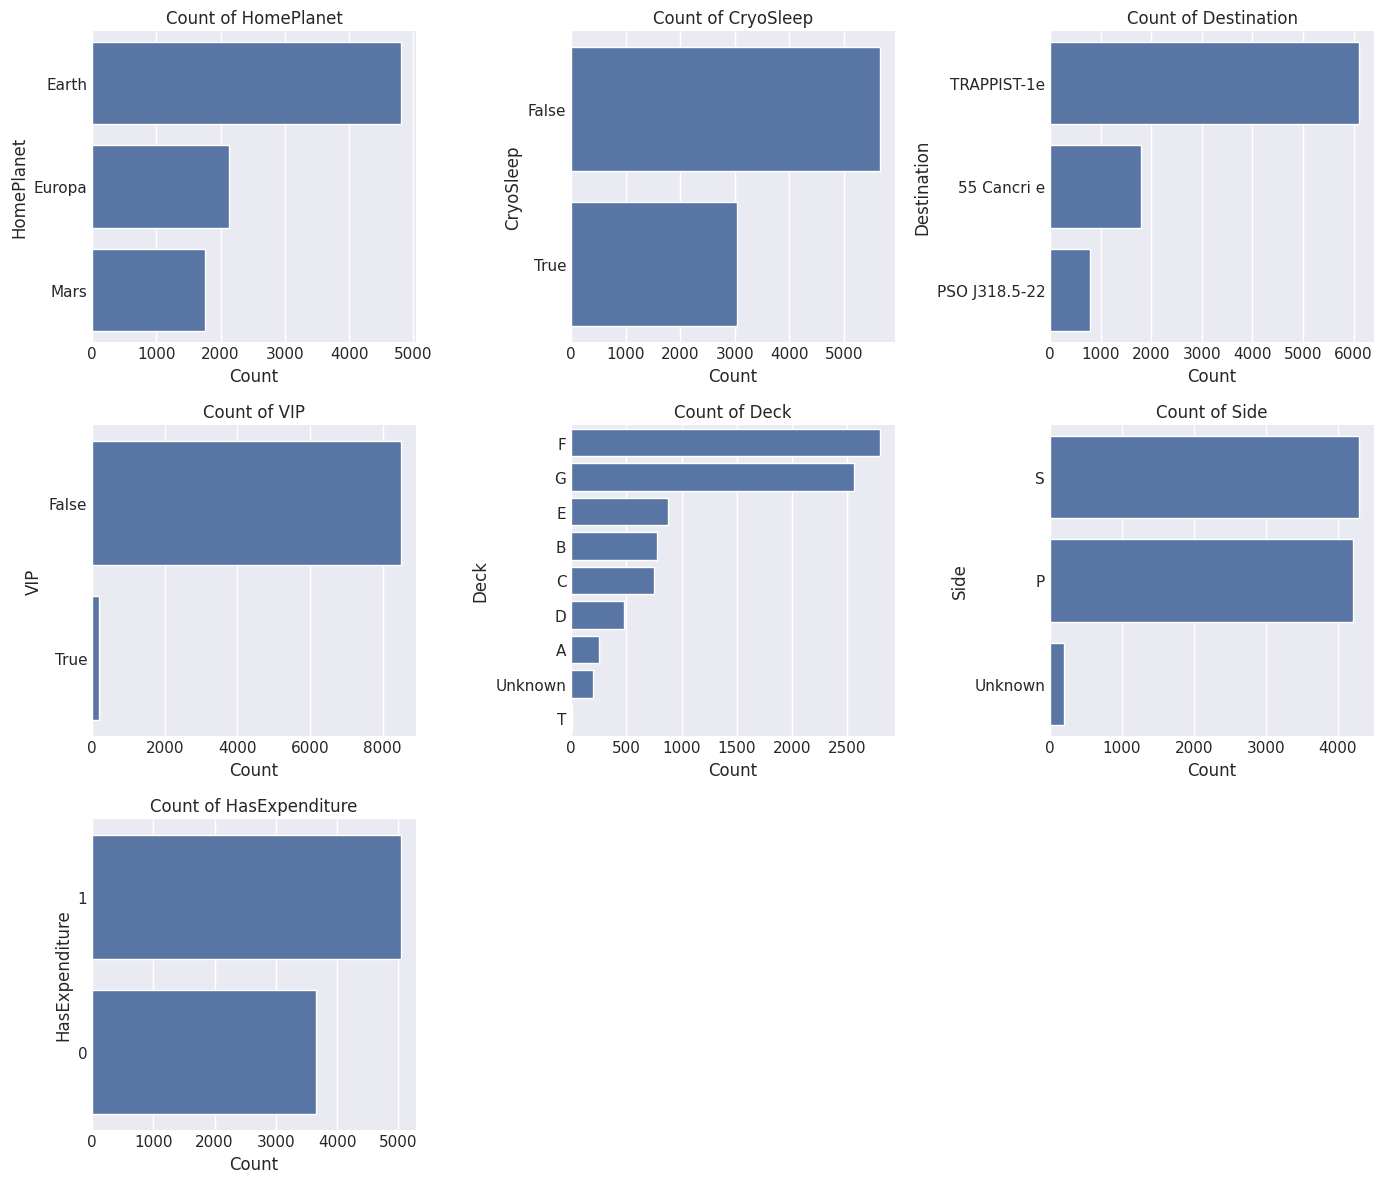

In [26]:
# Select key categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'HasExpenditure']

print("\n--- Categorical Feature Distributions (Training Data) ---")

plt.figure(figsize=(14, 12)) # Increase figure size for more plots
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1) # Adjust grid size (3x3 here)
    sns.countplot(data=df_train_processed, y=col, order = df_train_processed[col].value_counts().index) # Order bars by count
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col) # y-axis label set automatically by seaborn with y=col
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


--- Numerical Features vs. Transported ---


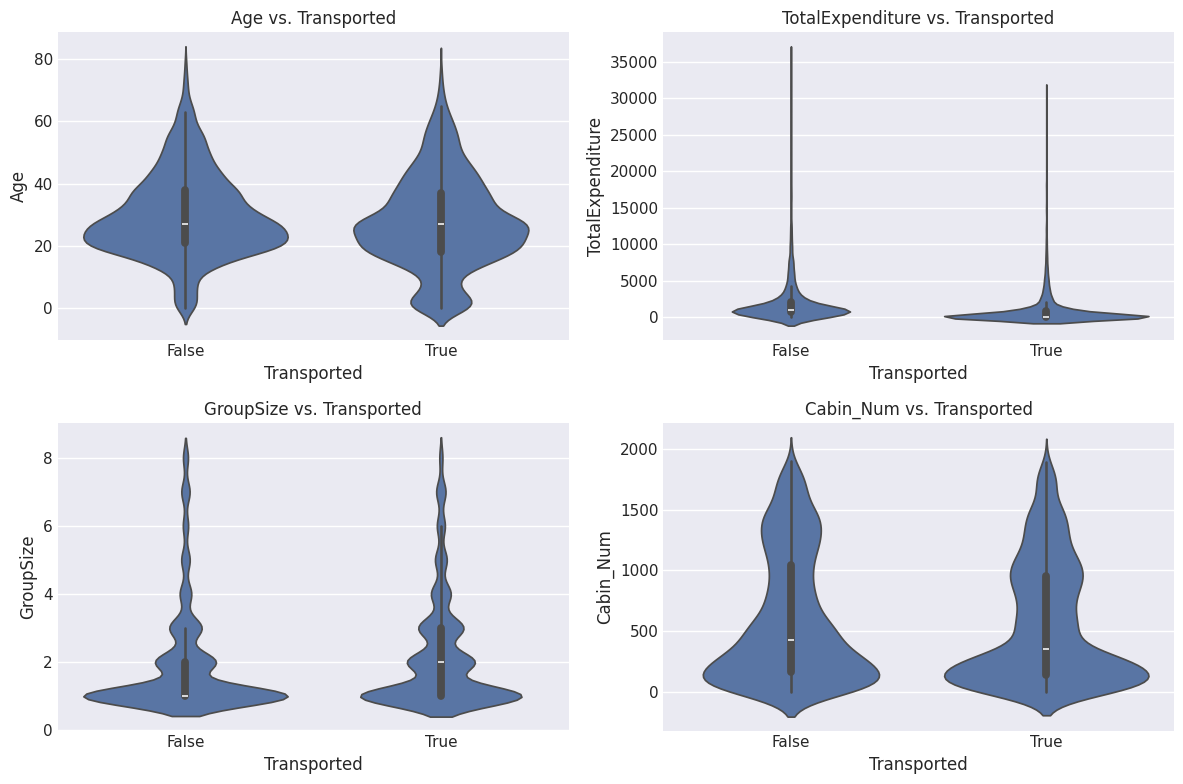

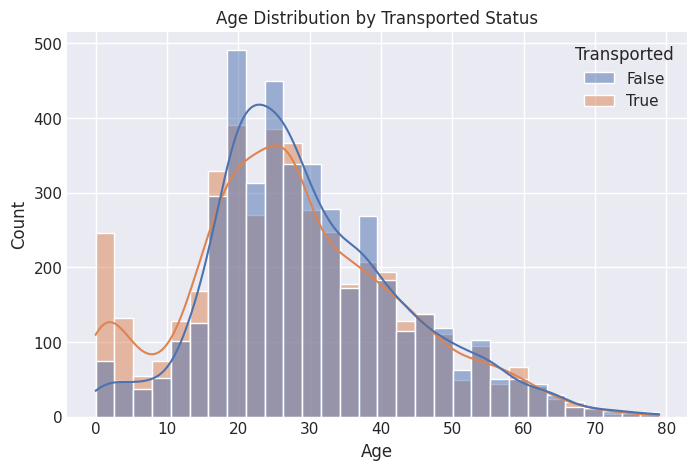

In [27]:
print("\n--- Numerical Features vs. Transported ---")

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1) # Adjust grid size
    # Violin plots combine a box plot with the kernel density estimation
    sns.violinplot(data=df_train_processed, x='Transported', y=col)
    # Box plots are simpler and show quartiles/outliers clearly
    # sns.boxplot(data=df_train_processed, x='Transported', y=col)
    plt.title(f'{col} vs. Transported')
plt.tight_layout()
plt.show()

# Let's specifically look at Age vs Transported with a histogram overlay
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train_processed, x='Age', hue='Transported', kde=True, bins=30)
plt.title('Age Distribution by Transported Status')
plt.show()


--- Categorical Features vs. Transported ---


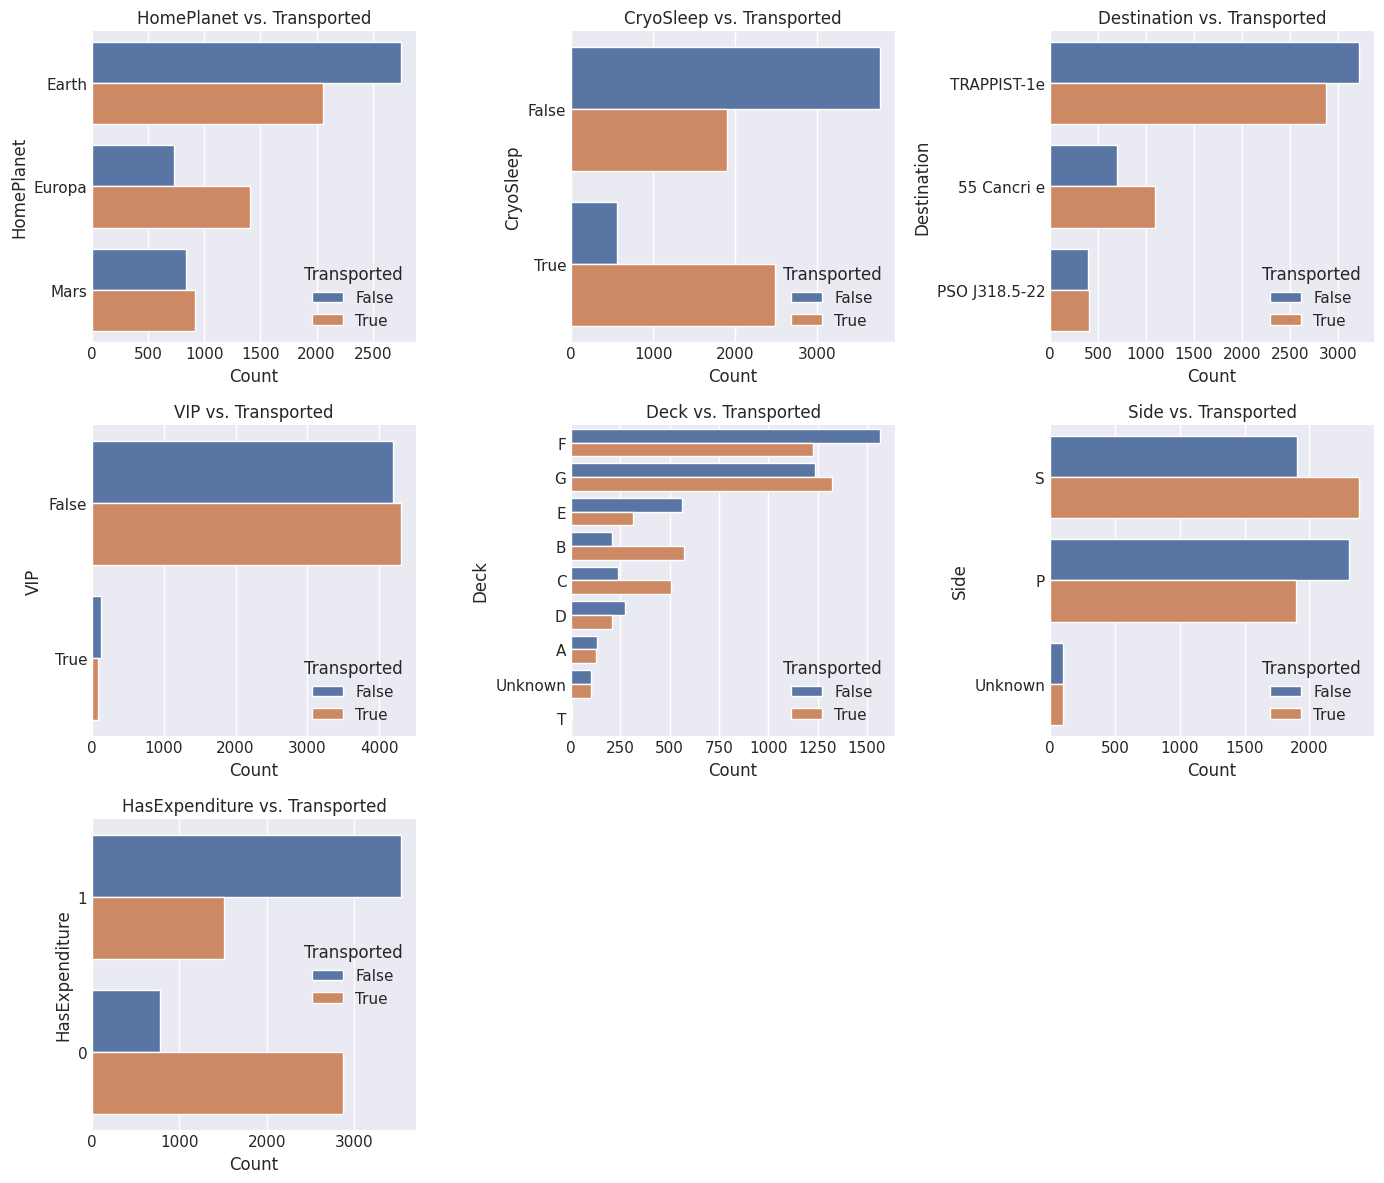

In [28]:
print("\n--- Categorical Features vs. Transported ---")

plt.figure(figsize=(14, 12)) # Increase figure size
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1) # Adjust grid size
    # Use hue to split bars by 'Transported' status
    sns.countplot(data=df_train_processed, y=col, hue='Transported', order = df_train_processed[col].value_counts().index)
    plt.title(f'{col} vs. Transported')
    plt.xlabel('Count')
    plt.ylabel(col)
    # Optionally calculate and display proportions/percentages here if needed
plt.tight_layout()
plt.show()


--- Numerical Feature Correlation Heatmap ---


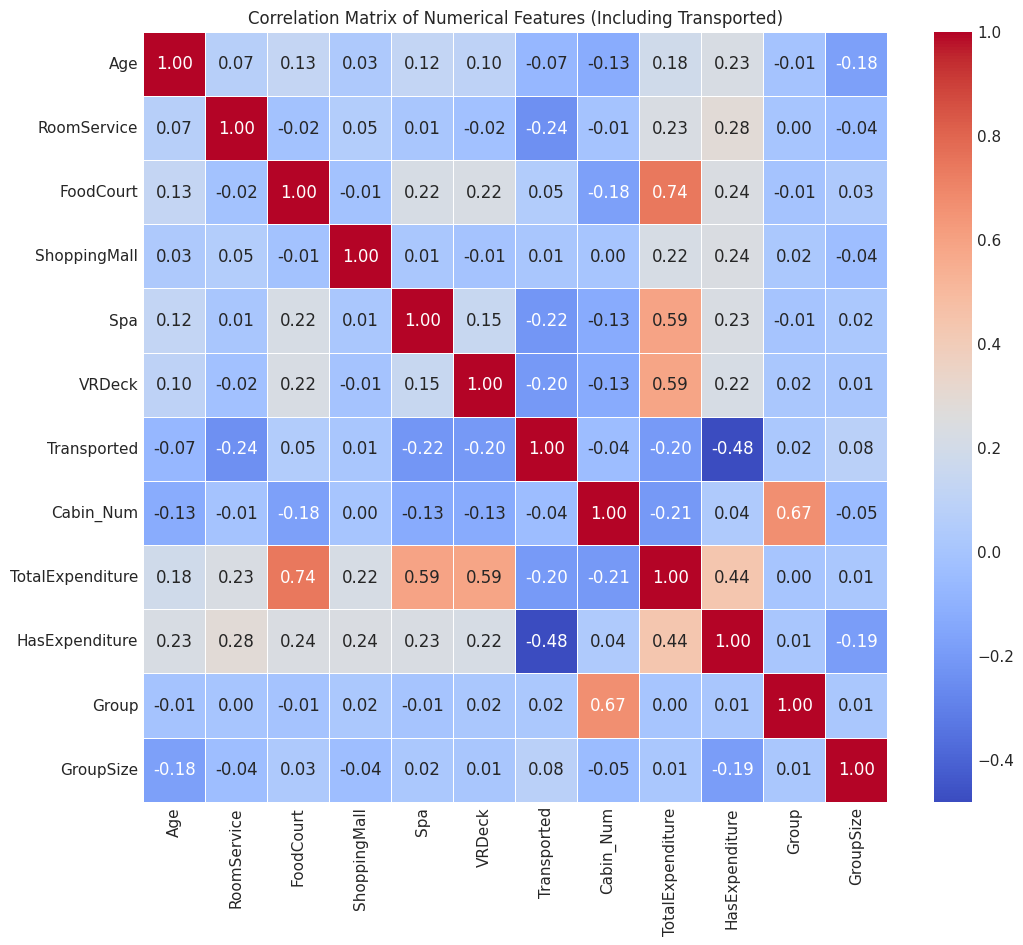

In [29]:
print("\n--- Numerical Feature Correlation Heatmap ---")

# Convert boolean 'Transported' to integer (0 or 1) for correlation calculation
df_train_corr = df_train_processed.copy()
df_train_corr['Transported'] = df_train_corr['Transported'].astype(int)

# Select only numerical columns for the correlation matrix
# Include the integer version of 'Transported'
numerical_for_corr = df_train_corr.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 10))
correlation_matrix = df_train_corr[numerical_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Including Transported)')
plt.show()

### Final feature selection and create training and validation sets

In [30]:
# Define the target variable
target = 'Transported'

# Select features for the model
# Let's keep most engineered features and original categoricals/numericals that seemed relevant
# Drop individual expenditures (use TotalExpenditure/HasExpenditure instead)
# Drop Cabin_Num (might be noisy, potentially redundant with Group/Deck/Side)
features_to_keep = [
    'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
    'Deck', 'Side',  # From Cabin
    'TotalExpenditure', 'HasExpenditure', # From Expenditures
    'Group', 'GroupSize' # From PassengerId
]

# Create final dataframes for modeling
X_train = df_train_processed[features_to_keep].copy()
y_train = df_train_processed[target].copy()
X_test = df_test_processed[features_to_keep].copy() # This is the final test set for submission

print("Selected features for modeling:")
print(X_train.columns.tolist())
print(f"\nTraining features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}")

# Check final data types one last time
print("\nTraining features info:")
X_train.info()

Selected features for modeling:
['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Deck', 'Side', 'TotalExpenditure', 'HasExpenditure', 'Group', 'GroupSize']

Training features shape: (8693, 11)
Training target shape: (8693,)
Test features shape: (4277, 11)

Training features info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        8693 non-null   object 
 1   CryoSleep         8693 non-null   bool   
 2   Destination       8693 non-null   object 
 3   Age               8693 non-null   float64
 4   VIP               8693 non-null   bool   
 5   Deck              8693 non-null   object 
 6   Side              8693 non-null   object 
 7   TotalExpenditure  8693 non-null   float64
 8   HasExpenditure    8693 non-null   int64  
 9   Group             8693 non-null   int64  
 10  GroupSize         8693 non-null   

In [33]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
# test_size=0.2 means 20% of the data becomes the validation set
# random_state ensures reproducibility (the split is the same each time)
# stratify=y_train ensures the proportion of True/False in 'Transported' is ~the same in both sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Original training data size: {len(X_train)}")
print(f"New training split size: {len(X_train_split)}")
print(f"Validation split size: {len(X_val_split)}")

# Verify stratification (proportions should be similar)
print("\nTarget distribution in original training set:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in new training split:")
print(y_train_split.value_counts(normalize=True))
print("\nTarget distribution in validation split:")
print(y_val_split.value_counts(normalize=True))

Original training data size: 8693
New training split size: 6954
Validation split size: 1739

Target distribution in original training set:
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

Target distribution in new training split:
Transported
True     0.503595
False    0.496405
Name: proportion, dtype: float64

Target distribution in validation split:
Transported
True     0.503738
False    0.496262
Name: proportion, dtype: float64


## YDF

### Random Forest Learner

In [34]:
# Ensure the target variable name is defined
target = 'Transported'

# Combine features and labels for the training split
train_df = pd.concat([X_train_split, y_train_split], axis=1)

# Combine features and labels for the validation split
val_df = pd.concat([X_val_split, y_val_split], axis=1)

print("Created combined DataFrames for YDF training and validation.")
print(f"Training DataFrame shape: {train_df.shape}")
print(f"Validation DataFrame shape: {val_df.shape}")
display(train_df.head(3)) # Quick check

Created combined DataFrames for YDF training and validation.
Training DataFrame shape: (6954, 12)
Validation DataFrame shape: (1739, 12)


,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,TotalExpenditure,HasExpenditure,Group,GroupSize,Transported
3600,Earth,False,TRAPPIST-1e,0.0,False,G,S,0.0,0,3868,7,True
1262,Earth,True,TRAPPIST-1e,17.0,False,G,S,0.0,0,1336,1,True
8612,Earth,False,PSO J318.5-22,35.0,False,G,S,0.0,0,9193,1,False


In [ ]:
# Instantiate the Random Forest Learner
# We specify the label (target column name)
# We can leave most hyperparameters as default for the first run
# task=ydf.Task.CLASSIFICATION is usually inferred but good to be explicit
learner = ydf.RandomForestLearner(label=target, task=ydf.Task.CLASSIFICATION)

print("Training Random Forest model...")
# Train the model on the training split DataFrame
model = learner.train(train_df)
print("Model training complete.")

# You can optionally inspect the model structure or variable importances
# print(model.summary())

Training Random Forest model...
Train model on 6954 examples
Model trained in 0:00:00.592389
Model training complete.


In [36]:
print("\nEvaluating model on the validation set...")
# Evaluate the model on the validation split DataFrame
evaluation = model.evaluate(val_df)
print("Evaluation results:")
print(evaluation)

# YDF evaluation results often include accuracy, logloss, AUC, etc.


Evaluating model on the validation set...
Evaluation results:
accuracy: 0.760782
confusion matrix:
    label (row) \ prediction (col)
    +-------+-------+-------+
    |       | false |  true |
    +-------+-------+-------+
    | false |   741 |   122 |
    +-------+-------+-------+
    |  true |   294 |   582 |
    +-------+-------+-------+
characteristics:
    name: 'true' vs others
    ROC AUC: 0.819975
    PR AUC: 0.864554
    Num thresholds: 285
loss: 0.509099
num examples: 1739
num examples (weighted): 1739

